In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib,pprint,keras
import random

import FBNN2d,sei_kume,myResNet,FBNN3d
importlib.reload(FBNN2d)
importlib.reload(sei_kume)
importlib.reload(myResNet)
importlib.reload(FBNN3d)
from FBNN2d import *
from sei_kume import *
from myResNet import *
from FBNN3d import *

# 1次元Fisher-Bingham分布

1. 全くハイパーパラメータ等を調整していないNN

loss(mse), mae, T-0 logL: 58.451502, 5.888853, 6.561078


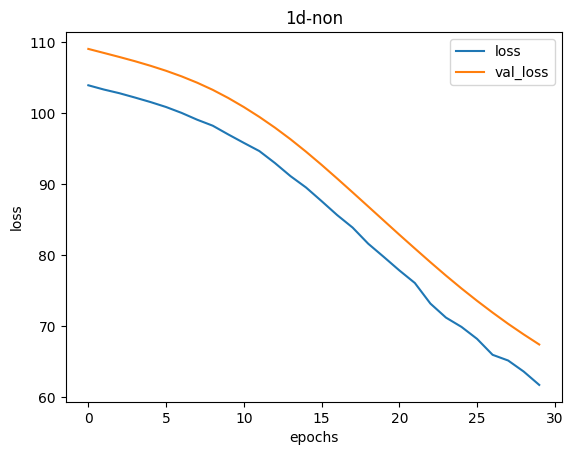

In [35]:
(x_train,y_train) = gene_data(hist_gene_int,Sig_lim=20,mu_lim=20,gene_size=500,multi=100)
test_data=[gene_data(hist_gene_int,Sig_lim=20,mu_lim=20,gene_size=50,multi=100) for _ in range(5)]

model1   = set_model(n_hidden=20,n_layer=1,print_summary=False)
history1 = model1.fit(x_train, y_train, verbose=0, epochs=30, shuffle=False, validation_split=0.2)

scores = [model1.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data]
score  = np.mean(scores,axis=0)
(x_test,y_test) = test_data[0]
mean_res = comp_logL_Sigmu(model1,x_test,y_test,method="hg")["T-0"]
print("loss(mse), mae, T-0 logL: %f, %f, %f"%(score[0],score[1],mean_res))

fig, axes = plt.subplots()
df1 = pd.DataFrame(history1.history)[['loss', 'val_loss']]
df1.plot(ax=axes,xlabel="epochs",ylabel="loss",title="1d-non")
plt.show()

In [104]:
(x_test,y_test) = gene_data(hist_gene_int,Sig_lim=20,mu_lim=20,gene_size=3,multi=100)
logL = comp_logL_Sigmu(model1,x_test,y_test,mle=True)
print("T-0 logL,mle-0 diff: %f, %f"%(logL["T-0"],logL["M-0"]))

T-0 logL,mle-0 diff: 8.375220, 7.575039


2. 提案手法

loss(mse), mae, T-0 logL: 20.952852, 3.263868, 0.707414


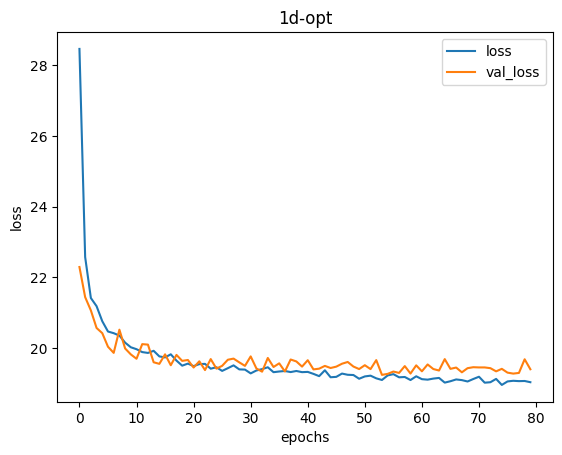

In [79]:
(x_train,y_train) = gene_data_one(hist_gene,eig0=2,Sig_lim=20,mu_lim=20,gene_size=3000,multi=1000,center=np.pi)
test_data         =[gene_data_one(hist_gene,eig0=2,Sig_lim=20,mu_lim=20,gene_size=20,multi=100,center=np.pi) for _ in range(10)]

model2 = set_model_LeakyReLU(n_hidden=400,n_layer=5,print_summary=False,leaky_alpha=0.01)
history2 = model2.fit(x_train, y_train, verbose=0, epochs=80, shuffle=True, validation_split=0.2)

scores = [model2.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data]
score  = np.mean(scores,axis=0)
(x_test,y_test) = test_data[0]
mean_res = comp_logL_Sigmu(model2,x_test,y_test,method="hg")["T-0"]
print("loss(mse), mae, T-0 logL: %f, %f, %f"%(score[0],score[1],mean_res))

fig, axes = plt.subplots()
df2 = pd.DataFrame(history2.history)[['loss', 'val_loss']]
df2.plot(ax=axes,xlabel="epochs",ylabel="loss",title="1d-opt")
plt.show()

In [103]:
(x_test,y_test) = gene_data_Normalize(hist_gene,Sig_lim=20,mu_lim=20,gene_size=3,multi=1000,center=np.pi)
logL = comp_logL_Sigmu(model2,x_test,y_test,mle=True)
print("T-0 logL,mle-0 diff: %f, %f"%(logL["T-0"],logL["M-0"]))

T-0 logL,mle-0 diff: 1.659843, 0.278949


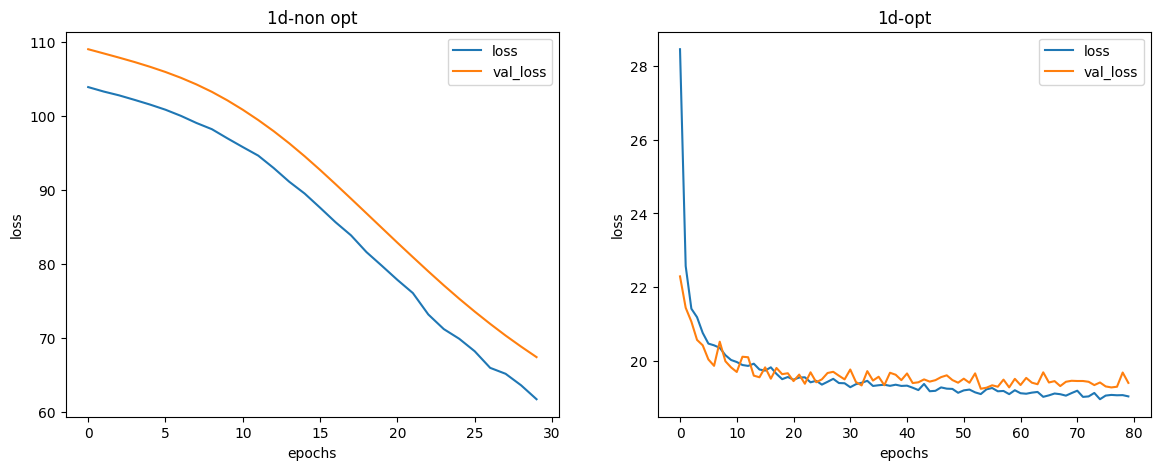

In [80]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 5))
df1.plot(ax=axes[0],xlabel="epochs",ylabel="loss",title="1d-non opt")
df2.plot(ax=axes[1],xlabel="epochs",ylabel="loss",title="1d-opt")

plt.show()

# 2次元Fisher-Bingham分布

1. 全くハイパーパラメータ等を調整していないNN

loss(mse), mae, T-0 logL: 28.865470, 3.994593, 3.813527


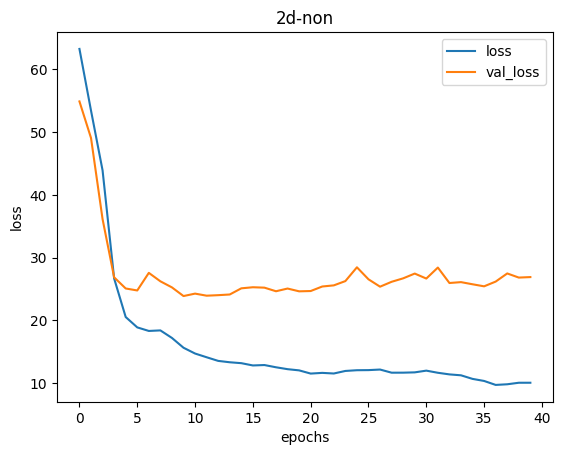

In [74]:
(x_train,y_train) = gene_data_3d(Sig_lim=20,mu_lim=20,gene_size=500,multi=1000)
test_data         =[gene_data_3d(Sig_lim=20,mu_lim=20,gene_size=20,multi=100) for _ in range(10)]

model3 = set_model_3d(n_hidden=1500,n_layer=3,print_summary=False)
history3 = model3.fit(x_train, y_train, verbose=0, epochs=40, shuffle=False, validation_split=0.2)

scores = [model3.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data]
score  = np.mean(scores,axis=0)
(x_test,y_test) = test_data[0]
mean_res = comp_logL_Sigmu_3d(model3,x_test,y_test)["T-0"]
print("loss(mse), mae, T-0 logL: %f, %f, %f"%(score[0],score[1],mean_res))

fig, axes = plt.subplots()
df3 = pd.DataFrame(history3.history)[['loss', 'val_loss']]
df3.plot(ax=axes,xlabel="epochs",ylabel="loss",title="2d-non")
plt.show()

In [112]:
(x_test,y_test) = gene_data_3d(Sig_lim=20,mu_lim=20,gene_size=3,multi=100)
logL = comp_logL_Sigmu_3d(model3,x_test,y_test,mle=True,tol=5*1e-2,t0=0)
print("T-0 logL,mle-0 diff: %f, %f"%(logL["T-0"],logL["M-0"]))

T-0 logL,mle-0 diff: 7.082683, 3.567536


2. 提案手法

loss(mse), mae, T-0 logL: 20.245674, 3.304992, 1.814615


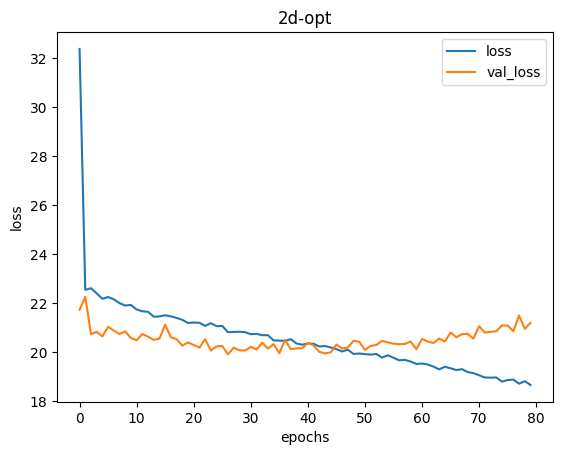

In [92]:
(x_train,y_train) = gene_data_3d(normalize=True,eig0=2,Sig_lim=20,mu_lim=20,gene_size=3000,multi=1000)
test_data        = [gene_data_3d(normalize=True,eig0=2,Sig_lim=20,mu_lim=20,gene_size=20,multi=100) for _ in range(10)]

model4 = set_model_3d(n_hidden=1100,n_layer=5,print_summary=False)
history4 = model4.fit(x_train, y_train, verbose=0, epochs=80, shuffle=True, validation_split=0.2)

scores = [model4.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data]
score  = np.mean(scores,axis=0)
(x_test,y_test) = test_data[0]
mean_res = comp_logL_Sigmu_3d(model4,x_test,y_test)["T-0"]
print("loss(mse), mae, T-0 logL: %f, %f, %f"%(score[0],score[1],mean_res))

fig, axes = plt.subplots()
df4 = pd.DataFrame(history4.history)[['loss', 'val_loss']]
df4.plot(ax=axes,xlabel="epochs",ylabel="loss",title="2d-opt")
plt.show()

In [113]:
(x_test,y_test) = gene_data_3d(normalize=True,Sig_lim=20,mu_lim=20,gene_size=3,multi=1000)
logL = comp_logL_Sigmu_3d(model4,x_test,y_test,mle=True,t0=1,tol=5*1e-2)
print("T-0 logL,mle-0 diff: %f, %f"%(logL["T-0"],logL["M-0"]))

T-0 logL,mle-0 diff: 3.183926, 0.298254


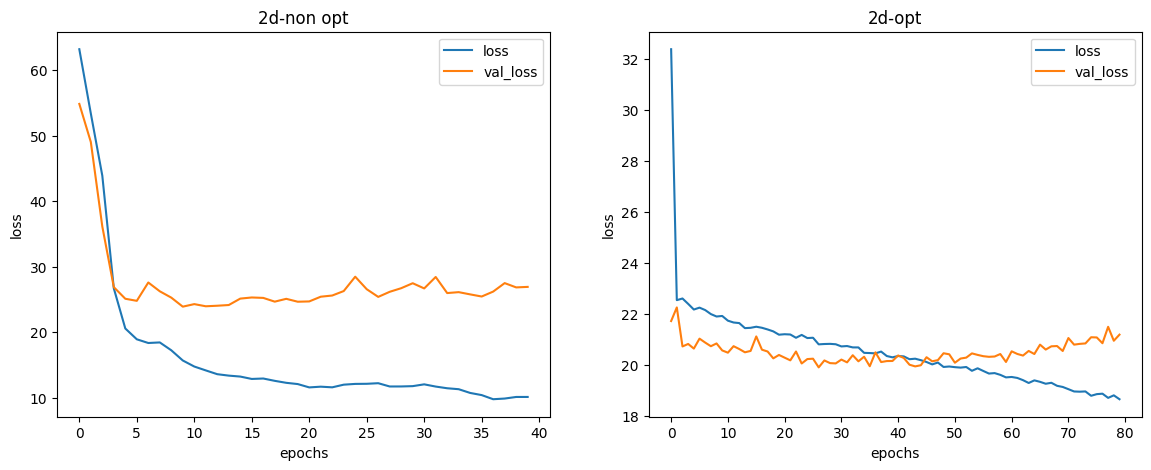

In [93]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 5))
df3.plot(ax=axes[0],xlabel="epochs",ylabel="loss",title="2d-non opt")
df4.plot(ax=axes[1],xlabel="epochs",ylabel="loss",title="2d-opt")

plt.show()